# I did all of this in my local
## hence had to drastically reduce my overall dataset volumne while training and testing 

###  i understand the repercussions of this in terms of performance of the model on the overall population and the accuracy of my answers.


In [1]:
import pandas as pd 
import numpy as np


In [2]:
## read the january trip details 
january_trip = pd.read_parquet(r'D:\MLOPS learning\mlops_zoomcamp\01\yellow_tripdata_2023-01.parquet')
january_trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
january_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
# lets compute the duration of the trip in minutes 
january_trip['duration'] = (january_trip['tpep_dropoff_datetime'] - january_trip['tpep_pickup_datetime']).dt.total_seconds() / 60
print(january_trip['duration'].describe())
print(january_trip['duration'].head()) 



count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64
0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64


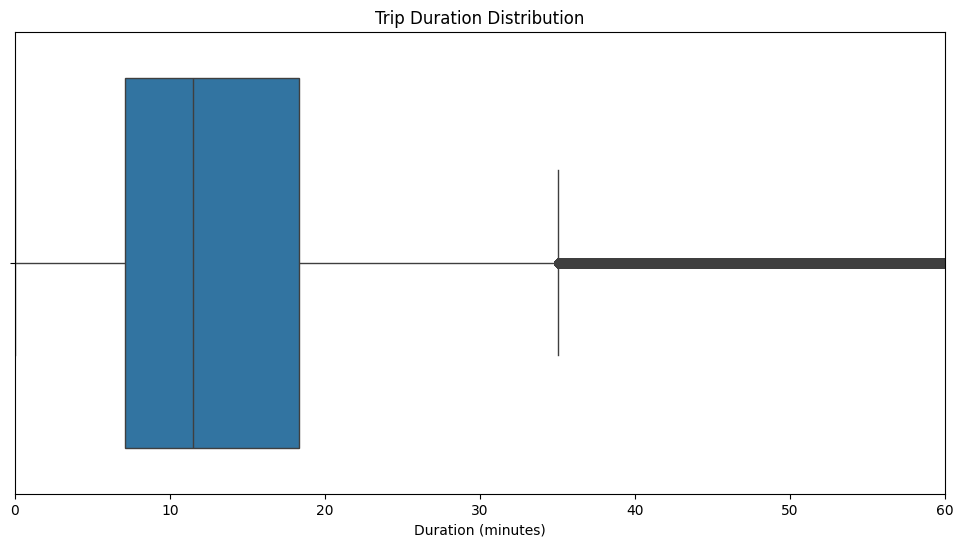

In [5]:
# lets see the distribution of the duration by using a box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=january_trip['duration'])
plt.xlim(0, 60)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()


In [6]:
# drop values that are  greater than 60 minutes or less than 1 minute in a new variable
# and see the distribution of the duration again
january_trip_cleaned = january_trip[(january_trip['duration'] >= 1) & (january_trip['duration'] <= 60)]
print(january_trip_cleaned['duration'].describe())
print(january_trip_cleaned['duration'].head()) 

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: duration, dtype: float64
0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64


In [7]:
# find the reduction of count in percentage from the original data to the cleaned data
reduction_count = len(january_trip) - len(january_trip_cleaned)
reduction_percentage = (1 - (reduction_count / len(january_trip))) * 100
print(f"Reduction in count: {reduction_count} ({reduction_percentage:.2f}%)")
print(f"Original count: {len(january_trip)}")
print(f"Cleaned count: {len(january_trip_cleaned)}")


Reduction in count: 57593 (98.12%)
Original count: 3066766
Cleaned count: 3009173


In [8]:
print(january_trip_cleaned.head())
print(january_trip_cleaned.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [9]:
# Fit a dictionary vectorizer to the january trip location dict 
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)


In [10]:
january_trip_location = january_trip_cleaned[['PULocationID', 'DOLocationID']].copy()
january_trip_location['PULocationID'] = january_trip_location['PULocationID'].astype(str)
january_trip_location['DOLocationID'] = january_trip_location['DOLocationID'].astype(str)
# add duration to the january_trip_location dataframe
january_trip_location['duration'] = january_trip_cleaned['duration'].values
january_trip_location.head()



,PULocationID,DOLocationID,duration
0,161,141,8.433333
1,43,237,6.316667
2,48,238,12.750000
3,138,7,9.616667
4,107,79,10.833333


In [11]:
df_small = january_trip_location.sample(frac=0.1, random_state=42)
print(df_small.head())  # Print the first 5 rows to check the output
print(df_small.info())  # Print the info of the dataframe to check the output

        PULocationID DOLocationID   duration
1504444          238           74  21.666667
187264            87            4   8.466667
2842284          142          140  11.766667
402839           236          231  20.366667
1146455          234          230  18.166667
<class 'pandas.core.frame.DataFrame'>
Index: 300917 entries, 1504444 to 478629
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PULocationID  300917 non-null  object 
 1   DOLocationID  300917 non-null  object 
 2   duration      300917 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB
None


In [12]:
# create X_small that is only of pulocation and dolocation ids
X_small = df_small[['PULocationID', 'DOLocationID']].copy()
X_small['PULocationID'] = X_small['PULocationID'].astype(str)
X_small['DOLocationID'] = X_small['DOLocationID'].astype(str)

# create y_small that is only of duration
y_small = df_small[['duration']].copy()


In [13]:
# now create X and y from the df_small dataframe

X_small_dict = dv.fit_transform(X_small.to_dict(orient='records'))
print(X_small_dict.shape)  # Check the shape of the feature matrix to ensure it matches the expected output
print(X_small_dict.shape)  # Check the shape of the target vector to ensure it matches the expected output


(300917, 496)
(300917, 496)


In [14]:
# lets run a linear regression model on the data no need to split the data into train and test sets as we are not going to use it for prediction
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_small_dict, y_small)  # Fit the model to the feature matrix and target variable
print(f"Model coefficients: {model.coef_}")  # Print the model coefficients to check the output
print(f"Model intercept: {model.intercept_}")  # Print the model intercept to check the output


Model coefficients: [[ 1.91952644e+01 -2.37668913e+01 -4.09195769e+00 -4.43015017e+00
  -6.31276277e+00  8.17276011e+00 -5.70953438e+00  3.65268618e+00
  -1.02762349e+01  8.80548004e+00 -4.52778954e+00  1.24027055e+00
  -3.94466731e+00 -3.46550804e+00  2.27000199e+00  6.55727717e+00
   2.03594815e+01  9.93827476e-01  1.97597869e+00  1.86859890e+00
  -5.29550221e+00 -1.23773950e+00  7.66448175e+00 -2.08060977e+01
  -3.21072483e+00  3.92727916e+00  5.31246242e+00  6.60248706e+00
  -1.91965468e-01  4.76903211e-01 -1.44210559e+01 -6.35923482e+00
   1.53402132e+01  7.04856714e+00 -1.10878216e+01 -8.86028310e+00
   8.57296822e+00 -5.57451436e+00  7.53835946e+00 -1.83912785e+01
   6.82547687e+00 -3.72626328e+00 -5.31969163e+00 -4.65625576e+00
  -3.85449722e+00 -1.43411663e+00 -1.70313914e+00 -9.18830832e-01
   5.52609276e+00 -1.60749915e+00 -6.61149368e-01 -7.77064547e+00
   3.20807769e+00 -4.11269252e+00 -1.43327527e+00  9.24790605e+00
  -1.58666784e+01 -7.78175142e-01  1.04686256e+01 -1.937

In [15]:
# calculate rmse 
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_small_dict)  # Predict the target variable using the feature matrix
rmse = np.sqrt(mean_squared_error(y_small, y_pred))  # Calculate the root mean squared error
print(f"RMSE: {rmse}")  # Print the RMSE to check the output


RMSE: 7.647460801474277


In [16]:
# now lets bring in the february trip data 
february_trip = pd.read_parquet(r'D:\MLOPS learning\mlops_zoomcamp\01\yellow_tripdata_2023-02.parquet')
february_trip.head()
february_trip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913955 entries, 0 to 2913954
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [17]:
# compute the duration of the trip in minutes for february trip data and remove the values greater than 60 minutes or less than 1 minute
february_trip['duration'] = (february_trip['tpep_dropoff_datetime'] - february_trip['tpep_pickup_datetime']).dt.total_seconds() / 60


# # drop values that are  greater than 60 minutes or less than 1 minute in a new variable
# february_trip_cleaned = february_trip[(february_trip['duration'] >= 1) & (february_trip['duration'] <= 60)]


# # find the reduction of count in percentage from the original data to the cleaned data
# reduction_count = len(february_trip) - len(february_trip_cleaned)
# reduction_percentage = (1 - (reduction_count / len(february_trip))) * 100
# print(f"Reduction in count: {reduction_count} ({reduction_percentage:.2f}%)")  # Print the reduction count and percentage to check the output
# print(f"Original count: {len(february_trip)}")  # Print the original count to check the output
# print(f"Cleaned count: {len(february_trip_cleaned)}")  # Print the cleaned count to check the output



In [19]:
# lets create a new df with onlu the pickup and dropoff location IDs for february trip data
# february_trip_location = february_trip_cleaned[['PULocationID', 'DOLocationID']].copy()
february_trip_location = february_trip[['PULocationID', 'DOLocationID']].copy()

# add the duration to the february_trip_location dataframe
# february_trip_location['duration'] = february_trip_cleaned['duration'].values
february_trip_location['duration'] = february_trip['duration'].values
print(february_trip_location.head())  # Print the first 5 rows to check the output
print(february_trip_location.info())  # Print the info of the dataframe to check the output


   PULocationID  DOLocationID   duration
0           142           163   1.683333
1            71            71   0.233333
2            71            71   0.233333
3           132            26  32.083333
4           161           145  13.300000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913955 entries, 0 to 2913954
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   PULocationID  int32  
 1   DOLocationID  int32  
 2   duration      float64
dtypes: float64(1), int32(2)
memory usage: 44.5 MB
None


In [20]:
# now lets create a new df that is 1/10 of the february trip data
df_small_feb = february_trip_location.sample(frac=0.1, random_state=42)
print(df_small_feb.head())  # Print the first 5 rows to check the output
print(df_small_feb.info())  # Print the info of the dataframe to check the output


         PULocationID  DOLocationID   duration
1288541           141           262   5.733333
482949            138            61  31.400000
2037515           138           163  36.316667
2411597           234           230  14.783333
1045088           137           132  20.816667
<class 'pandas.core.frame.DataFrame'>
Index: 291396 entries, 1288541 to 2366602
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PULocationID  291396 non-null  int32  
 1   DOLocationID  291396 non-null  int32  
 2   duration      291396 non-null  float64
dtypes: float64(1), int32(2)
memory usage: 6.7 MB
None


In [21]:
# create x and y for february trip data
X_small_feb = df_small_feb[['PULocationID', 'DOLocationID']].copy()
X_small_feb['PULocationID'] = X_small_feb['PULocationID'].astype(str)
X_small_feb['DOLocationID'] = X_small_feb['DOLocationID'].astype(str)

# create y for february trip data
y_small_feb = df_small_feb[['duration']].copy()


In [22]:
# now lets dict vectorize the february trip data
X_small_feb_dict = dv.transform(X_small_feb.to_dict(orient='records'))
print(X_small_feb_dict.shape)  # Check the shape of the feature matrix to ensure it matches the expected output


(291396, 496)


In [23]:
# now lets use the X_small_feb_dict to predict the duration of the february trip data using the model we trained on january trip data
y_pred_feb = model.predict(X_small_feb_dict)  # Predict the target variable using the feature matrix
# calculate rmse for february trip data
from sklearn.metrics import mean_squared_error

rmse_feb = np.sqrt(mean_squared_error(y_small_feb, y_pred_feb))  # Calculate the root mean squared error
print(f"RMSE for February trip data: {rmse_feb}")  # Print the RMSE to check the output


RMSE for February trip data: 40.39560903427866
